<a href="https://colab.research.google.com/github/LogeshkumarTamilselvam/CustomerConversionPrediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [3]:
# Read in the dataset
CCP = pd.read_csv('https://raw.githubusercontent.com/LogeshkumarTamilselvam/CustomerConversionPrediction/main/train.csv')

In [4]:
CCP

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [5]:
#Check column
CCP.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
#FILTER SAMPLE DATA FROM MAIN DATA SET
CCP.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


THEN WE HAVE FIND THE TARGET - Y

In [7]:
#FIND TOTAL LENGTH OF DATA
CCP.shape

(45211, 11)

In [8]:
CCP[CCP.duplicated()==True]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [9]:
CCP.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [10]:
CCP['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

No value greaterthan of Yes value, so its imbalanced data set

In [11]:
#Finding the percentage of the data
print('Percentage for "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage for "yes": ',((5289) / (39916+5289)) * 100 )

Percentage for "no":  88.29996681782988
Percentage for "yes":  11.700033182170113


As per the result No percentage very high compare to yes

# #**Data cleaning**

# #**Data analyzing**

the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [12]:
#to check duplicates in categorical to each column

CCP.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [13]:
x = (CCP['job'].unique())
x

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

No duplicated found

In [14]:
y = (CCP['marital'].unique())
y

array(['married', 'single', 'divorced'], dtype=object)

No duplicated found


In [15]:
z = (CCP['education_qual'].unique())
z

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
e = (CCP['call_type'].unique())
e

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
f = (CCP['mon'].unique())
f

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [18]:
t = (CCP['prev_outcome'].unique())
t

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [19]:
o = (CCP['y'].unique())
o

array(['no', 'yes'], dtype=object)

to verify the data, there is no duplicate, and no need any word correction

In [20]:
#droping duplicates
CCP = CCP.drop_duplicates()
CCP

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [21]:
#Make sure of duplicates
CCP.duplicated().sum()

0

In [22]:
CCP.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

object - CATEGARICAL VARIABLE


int64 - INTEGIER(NUMBERS)

#Analyzing and fixing data

<Axes: >

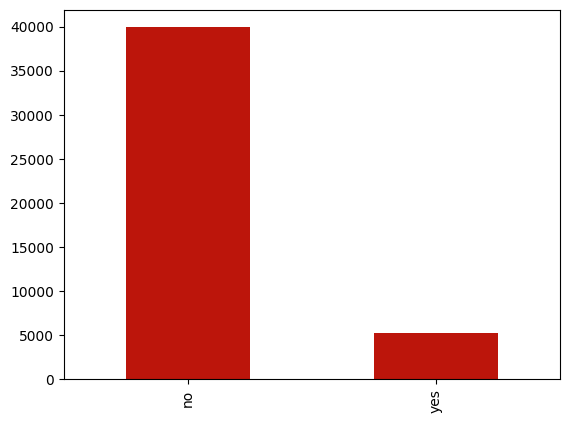

In [23]:
# Bar plot of target
CCP['y'].value_counts().plot.bar(color = np.random.rand(3,))

We can see value in barchart, so we have around 40000 - No value, and around 5000 Yes value

Then we will lookup each variable for proper understanding

Here we go with first age column

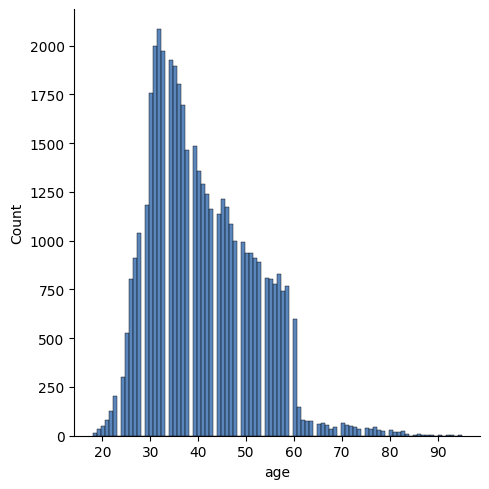

In [24]:
sns.displot(CCP["age"], color=np.random.rand(3,))

As per imgae we have data from age 15 to 95, and most are from 20-60.

and here we go with second column "job"

<Axes: >

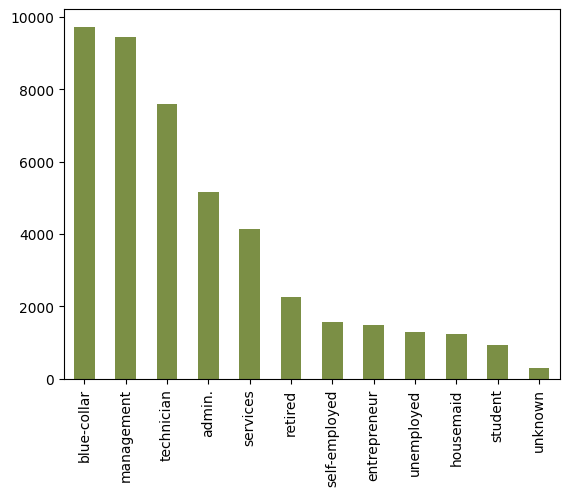

In [25]:
CCP['job'].value_counts().plot.bar(color = np.random.rand(3,))

As per the records blue-collar's are high value customers, and students are least customer

Next here we go with education qualification

<Axes: >

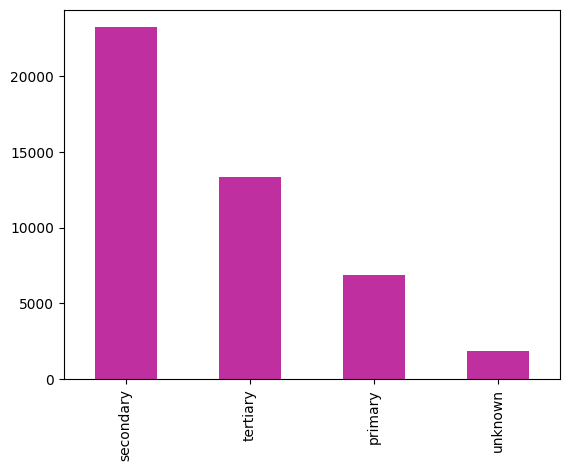

In [26]:
CCP['education_qual'].value_counts().plot.bar(color = np.random.rand(3,))

and lets compare with some columns

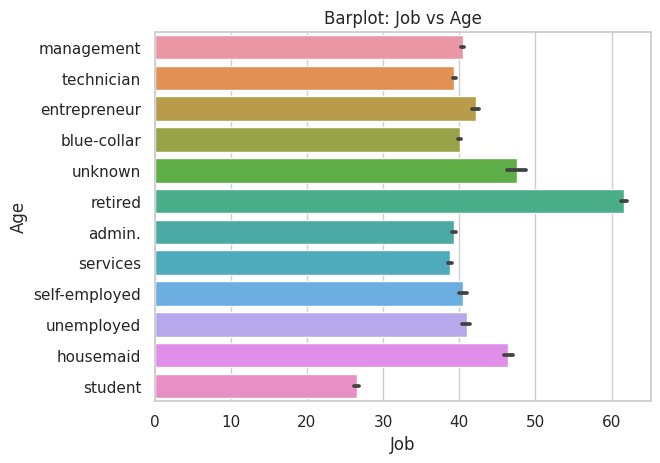

In [27]:
#compare with jon and age

# Set the style of the plot
sns.set(style="whitegrid")

# Create the barplot
ax = sns.barplot(x="age", y="job", data=CCP)

# Set labels and title
ax.set_xlabel('Job')
ax.set_ylabel('Age')
ax.set_title('Barplot: Job vs Age')

# Show the plot
plt.show()

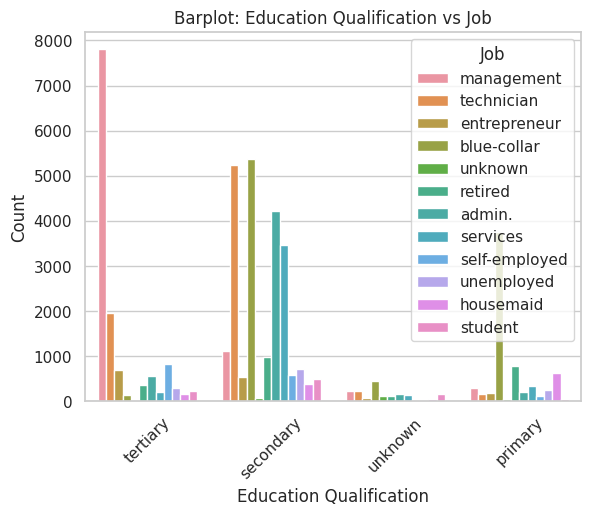

In [28]:
# Create the barplot
ax = sns.countplot(x="education_qual", hue="job", data=CCP)

# Set labels and title
ax.set_xlabel('Education Qualification')
ax.set_ylabel('Count')
ax.set_title('Barplot: Education Qualification vs Job')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust the legend
plt.legend(title="Job")

# Show the plot
plt.show()

Then analysing the conversion possible

y                no   yes
job                      
admin.         4539   631
blue-collar    9022   708
entrepreneur   1364   123
housemaid      1131   109
management     8156  1301
retired        1748   516
self-employed  1392   187
services       3784   369
student         669   269
technician     6756   840
unemployed     1101   202
unknown         254    34


Text(0, 0.5, 'Percentage')

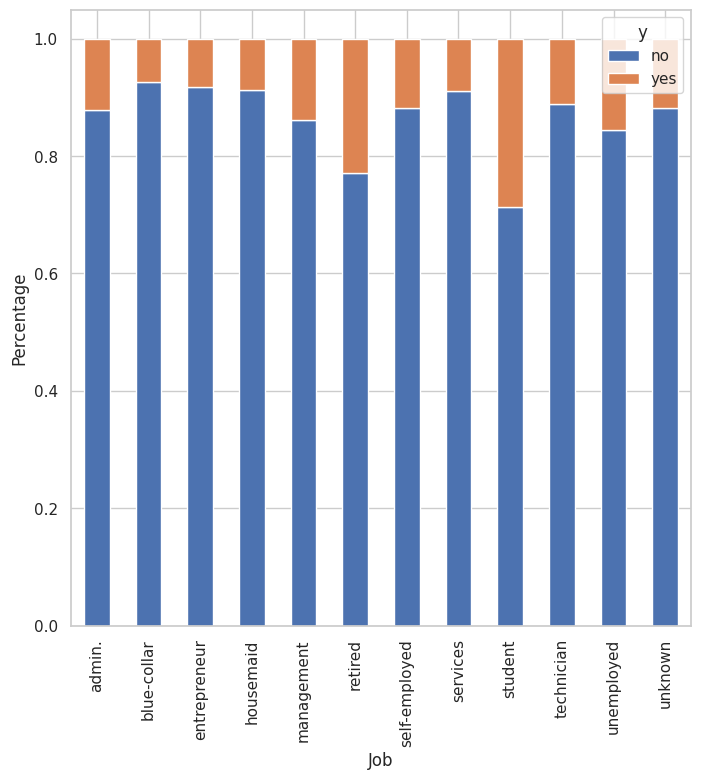

In [29]:
print(pd.crosstab(CCP['job'],CCP['y']))

job=pd.crosstab(CCP['job'],CCP['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

As per records, student's are most possible to take a policy

y                  no   yes
education_qual             
primary          6259   591
secondary       20749  2450
tertiary        11303  1996
unknown          1605   252


Text(0, 0.5, 'Percentage')

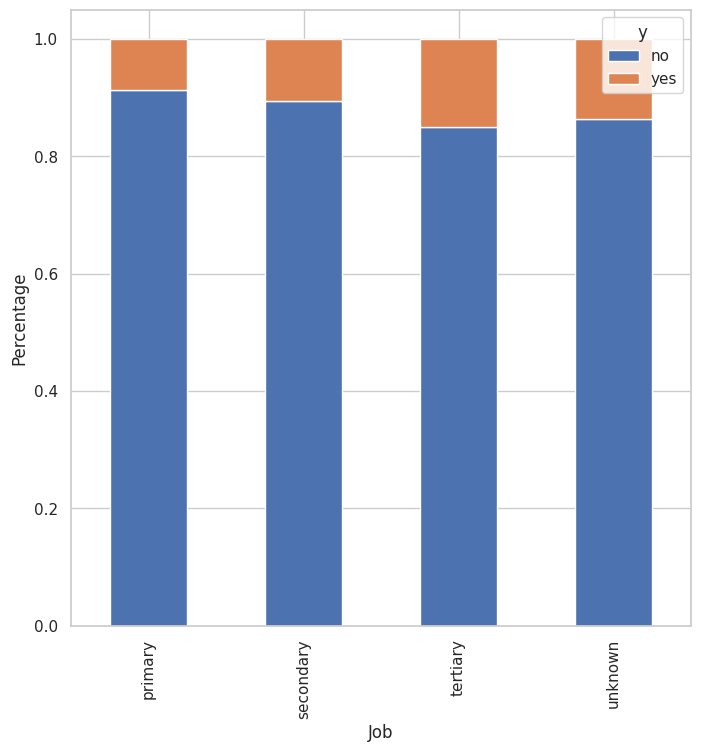

In [30]:
print(pd.crosstab(CCP['education_qual'],CCP['y']))

job=pd.crosstab(CCP['education_qual'],CCP['y'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

As per records tertiary people are higher chnges to subricb the policy

y            no   yes
marital              
divorced   4585   622
married   24455  2755
single    10876  1912


Text(0, 0.5, 'Percentage')

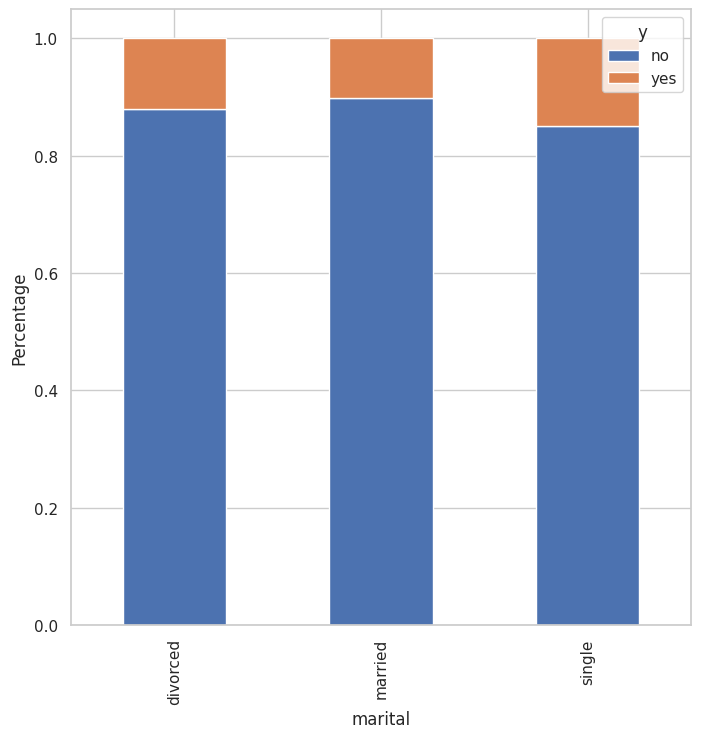

In [31]:
print(pd.crosstab(CCP['marital'],CCP['y']))

marital=pd.crosstab(CCP['marital'],CCP['y'])
marital.div(marital.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('marital')
plt.ylabel('Percentage')

As per image looks like divorced and single are hinger chances to take a policy

Let's now look at how correlated our numerical variables

In [33]:
CCP['y'].replace('no', 0,inplace=True)
CCP['y'].replace('yes', 1,inplace=True)

<ipython-input-33-464c1ed011c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCP['y'].replace('no', 0,inplace=True)
<ipython-input-33-464c1ed011c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCP['y'].replace('yes', 1,inplace=True)


<ipython-input-36-db48f8e4c588>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = CCP.corr()


<Axes: >

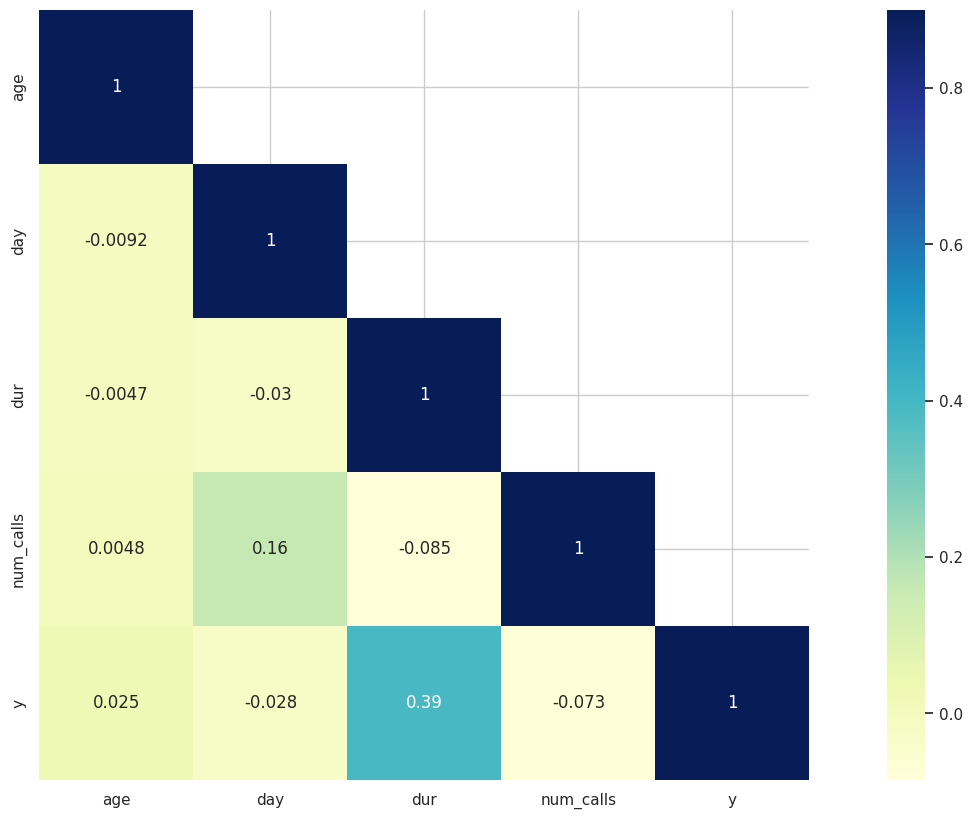

In [36]:
corr = CCP.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

duration of the call is highly correlated with the target variable.the duration of the call is more, there are higher chances that the client is showing interest in the term deposit

finding missing value in dataset

In [38]:
CCP.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Building the model